In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pickle
import os

# Load dataset using relative path
dataset = pd.read_csv(r"C:\Users\Chimni\Desktop\New folder\DataSets\VIEH_BCP_DATASET.csv")


In [2]:
# Drop unnecessary columns
dataset = dataset.drop(['id', 'Unnamed: 32'], axis=1)

# Encoding target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['diagnosis'] = encoder.fit_transform(dataset['diagnosis'])

# Split features and target variable
x = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

# Finding and removing correlated features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

correlated_features = list(correlation(x, 0.72))
x = x.drop(correlated_features, axis=1)


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = lr.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Accuracy Score and Classification Report
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[101   7]
 [  8  55]]
Accuracy score: 0.9122807017543859
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       108
           1       0.89      0.87      0.88        63

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



In [6]:
# Define the directory path
directory = r"C:\Users\Chimni\Desktop\New folder\Notebooks\Models"

# Ensure the directory exists, create it if not
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the file path
file_path = os.path.join(directory, 'breast_cancer_model.pkl')

# Save the model to the specified location
with open(file_path, 'wb') as file:
    pickle.dump(lr, file)

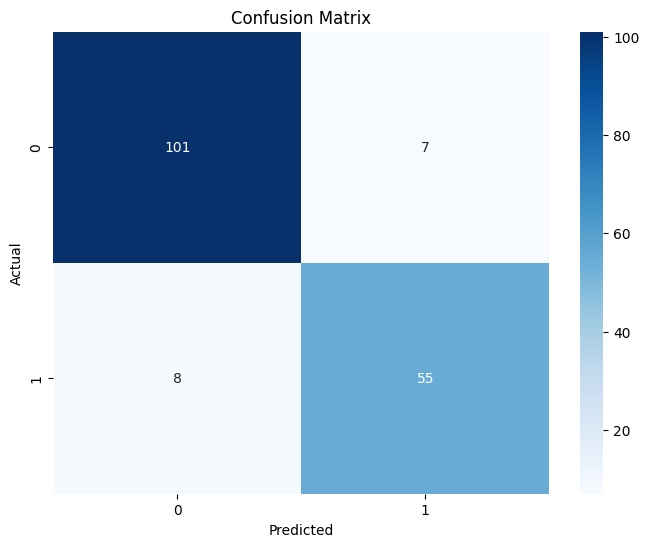

In [7]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


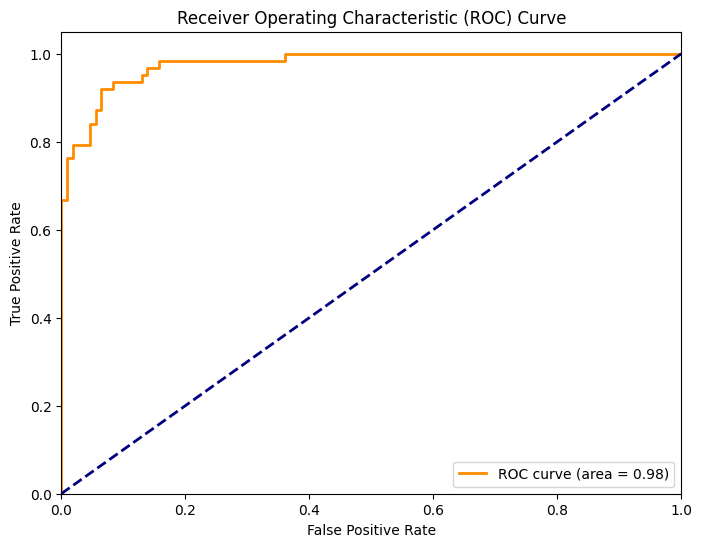

In [8]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


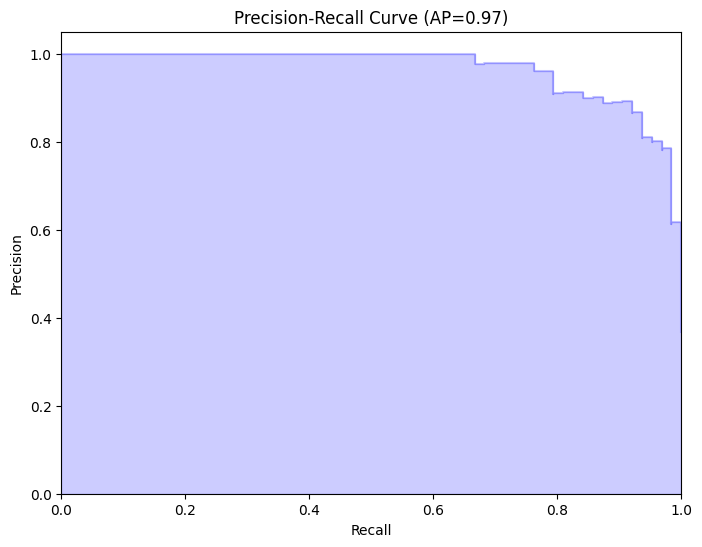

In [9]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, lr.predict_proba(x_test)[:, 1])
avg_precision = average_precision_score(y_test, lr.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP={0:0.2f})'.format(avg_precision))
plt.show()
